#### IMPORTS

In [1]:
import torch
import numpy as np
import sys
import os

main_dir = r'/home/karansingh/Documents/summer-term/ECG_ML/MAIN'
if main_dir not in sys.path:
    sys.path.append(main_dir)
from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
default_dir = os.getcwd()
def default_directory():
    os.chdir(f"{default_dir}")
    print(f"you are back to the default directory: {default_dir}")


In [3]:
default_directory()
os.getcwd()

you are back to the default directory: /home/karansingh/Documents/summer-term/ECG_ML/MAIN/ML


'/home/karansingh/Documents/summer-term/ECG_ML/MAIN/ML'

In [4]:
os.chdir("/home/karansingh/Documents/summer-term/KARAN_ECG/ML/data_cg_100")
os.getcwd()

'/home/karansingh/Documents/summer-term/KARAN_ECG/ML/data_cg_100'

#### LOAD DATA

In [5]:
## Create fake dataset for demonstration purposes

## Load your dataset and use 


data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_'+str(i)+'.txt')#/home/karansingh/Documents/summer-term/KARAN_ECG/ML/data_cg_100/disease_SB_svd_0.txt
    data_ST_list.append(cc)
    print(f"data st of length {len(cc)} in {i} index loaded")


data_ST_list = np.array(data_ST_list)
images = np.resize(data_ST_list,(5000,2500))

labels=np.zeros(5000)

data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_'+str(i)+'.txt')
    data_SB_list.append(cc)
    print(f"data sb of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SB_list,(5000,2500))))
labels=np.concatenate((labels,np.ones(5000)))

data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_svd_'+str(i)+'.txt')
    data_SR_list.append(cc)
    print(f"data sr of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SR_list,(5000,2500))))
labels=np.concatenate((labels,np.ones(5000)*2))
                    

data st of length 500 in 0 index loaded
data st of length 500 in 1 index loaded
data st of length 500 in 2 index loaded
data st of length 500 in 3 index loaded
data st of length 500 in 4 index loaded
data st of length 500 in 5 index loaded
data st of length 500 in 6 index loaded
data st of length 500 in 7 index loaded
data st of length 500 in 8 index loaded
data st of length 500 in 9 index loaded
data sb of length 500 in 0 index loaded
data sb of length 500 in 1 index loaded
data sb of length 500 in 2 index loaded
data sb of length 500 in 3 index loaded
data sb of length 500 in 4 index loaded
data sb of length 500 in 5 index loaded
data sb of length 500 in 6 index loaded
data sb of length 500 in 7 index loaded
data sb of length 500 in 8 index loaded
data sb of length 500 in 9 index loaded
data sr of length 500 in 0 index loaded
data sr of length 500 in 1 index loaded
data sr of length 500 in 2 index loaded
data sr of length 500 in 3 index loaded
data sr of length 500 in 4 index loaded


In [6]:
default_directory()
print(len(images),len(labels))
print(images.shape)
images = images.reshape(15000,1,50,50)
images.shape



you are back to the default directory: /home/karansingh/Documents/summer-term/ECG_ML/MAIN/ML
15000 15000
(15000, 2500)


(15000, 1, 50, 50)

#### CREATE BATCHES

In [7]:
# Create an instance of your dataset

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 6 * 6, 512)  # Adjusted input size for 50x50 input
        self.fc2 = nn.Linear(512, 3)
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 25x25
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 12x12
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 6x6
        
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 128 * 6 * 6)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#### TRAINING PARAMETERS

In [9]:
torch.manual_seed(37)  # Set seed for reproducibility
model__ = SmallCNN()

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model__.parameters(), lr=0.001)  # Adam optimizer
def accuracy(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


#### TRAINING

In [12]:
test_losses_list=[]
torch.manual_seed(42)  # Set seed for reproducibilit
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model__ = SmallCNN().to(device)

with torch.no_grad():
    model__.eval()
    test_loss, accuracy_test = 0.0, 0.0
    for i, (images, labels) in enumerate(test_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        accuracy_test += accuracy(labels, outputs.argmax(dim=1))
test_losses_list.append(test_loss / len(test_dataloader))

print(accuracy_test / len(test_dataloader))

32.33599290780142


In [13]:
device

device(type='cuda')

In [15]:
torch.manual_seed(42)  # Set seed for reproducibility
#cuda
device = "cpu"
model__ = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model__.parameters(), lr=0.0008)  # Adam optimizer

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 25
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/25], Train Loss: 0.9038, Test Loss: 1.0483, Train Accuracy: 59.3167, Test Accuracy: 35.8267
Epoch [2/25], Train Loss: 0.6076, Test Loss: 1.1778, Train Accuracy: 77.4667, Test Accuracy: 47.3183


KeyboardInterrupt: 

In [12]:
# save the model
#default_directory()
#torch.save(model__.state_dict(), 'model_smallCNN_v0.pth')



you are back to the default directory: /home/karansingh/Documents/summer-term/ECG_ML/MAIN/ML


In [13]:
temp=train_dataset[0]
len(temp)

2

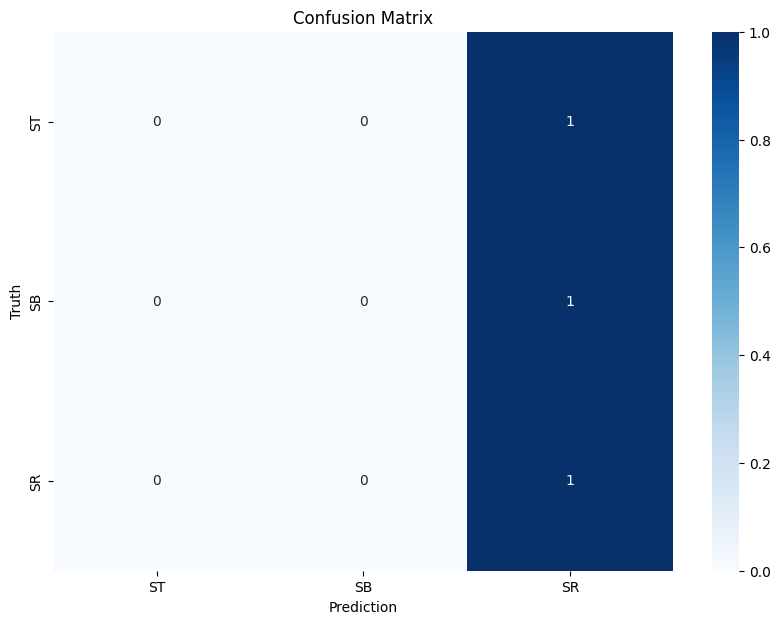

In [14]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

model__.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model__(images.to(device))
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR"], columns=["ST", "SB", "SR"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()




In [15]:

#Classification Report for Test Data:

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["ST", "SB", "SR"]))


              precision    recall  f1-score   support

          ST       0.00      0.00      0.00      1037
          SB       0.00      0.00      0.00       970
          SR       0.33      1.00      0.50       993

    accuracy                           0.33      3000
   macro avg       0.11      0.33      0.17      3000
weighted avg       0.11      0.33      0.16      3000



/home/karansingh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/karansingh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/karansingh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Average precision score, micro-averaged over all classes: 0.33


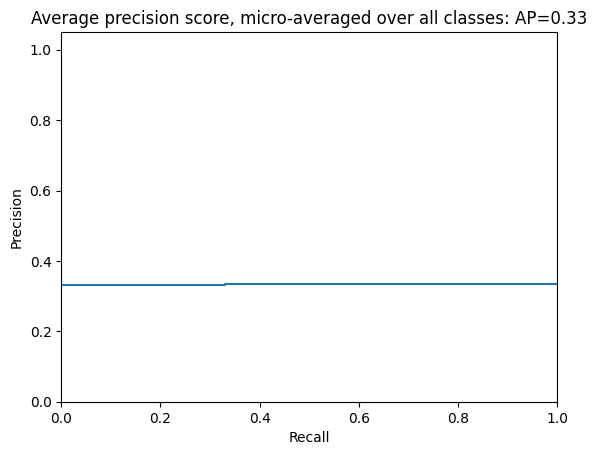

In [16]:
# presicion recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve((np.array(y_true) == i).astype(int),
                                                        (np.array(y_pred) == i).astype(int))
    average_precision[i] = average_precision_score((np.array(y_true) == i).astype(int), (np.array(y_pred) == i).astype(int))

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(np.eye(3)[y_true].ravel(),
    np.eye(3)[y_pred].ravel())
average_precision["micro"] = average_precision_score(np.eye(3)[y_true], np.eye(3)[y_pred],
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()

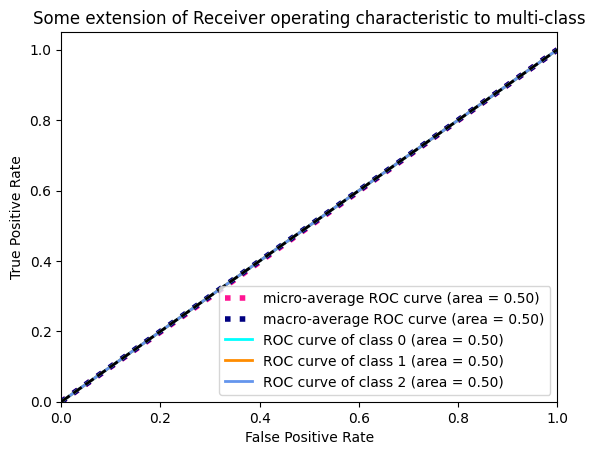

In [17]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test = label_binarize(y_true, classes=[0, 1, 2])
y_score = label_binarize(y_pred, classes=[0, 1, 2])


n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



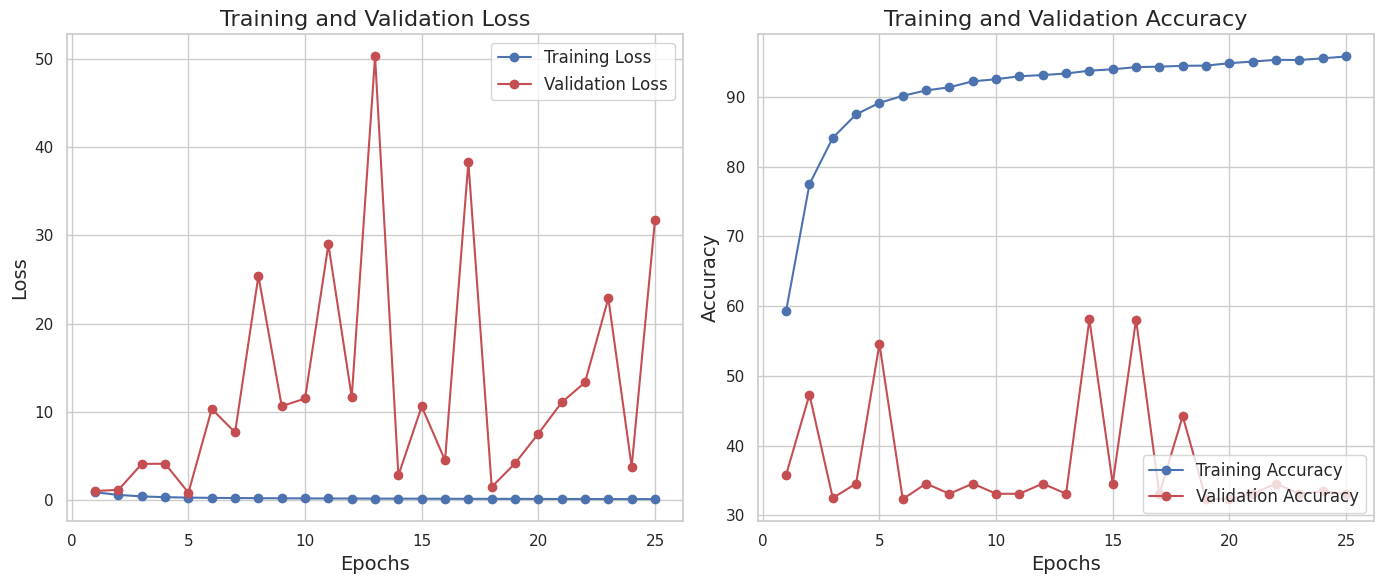

In [18]:
from plots import accuracy_and_validation_plots


# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list)+1))

accuracy_and_validation_plots(epochs_, train_losses_list, test_losses_list, accuracy_train_list,accuracy_test_list).plot_figure("accuracy.png")


In [19]:
def model_train(train_dataloader, test_dataloader,n):
    torch.manual_seed(n)  # Set seed for reproducibility
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model__ = Model().to(device)

    criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
    optimizer = optim.Adam(model__.parameters(), lr=0.001)  # Adam optimizer

    def accuracy(y_true, y_pred):
        correct = torch.eq(y_true, y_pred).sum().item()
        acc = (correct / len(y_pred)) * 100
        return acc

    num_epochs = 25
    test_losses_list = []
    train_losses_list = []
    accuracy_train_list = []
    accuracy_test_list = []

    for epoch in range(num_epochs):
        model__.train()
        running_loss, accuracy_train = 0.0, 0.0
        for i, (images, labels) in enumerate(train_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            accuracy_train += accuracy(labels, outputs.argmax(dim=1))
        train_losses_list.append(running_loss / len(train_dataloader))
        
        # Just calculating the test loss and accuracy
        with torch.no_grad():
            model__.eval()
            test_loss, accuracy_test = 0.0, 0.0
            for i, (images, labels) in enumerate(test_dataloader):
                images, labels = images.to(device), labels.to(device)  # Move data to GPU
                outputs = model__(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                accuracy_test += accuracy(labels, outputs.argmax(dim=1))
        test_losses_list.append(test_loss / len(test_dataloader))
        
        accuracy_train_list.append(accuracy_train / len(train_dataloader))
        accuracy_test_list.append(accuracy_test / len(test_dataloader))

        #print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')
    return train_losses_list, test_losses_list, accuracy_train_list, accuracy_test_list

In [20]:
from model_cnn import SmallCNN

